REQUIREMENTS

1. Describe your dataset. Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

2. Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

3. Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

MY THEME: Ramen data analytics

DESCRIPTION OF THE DATASET

This dataset was originally published by "The Ramen Rater", and released on Kaggle. The Ramen Rater is a product review website for the hardcore ramen enthusiast (or "ramenphile"), with over 2500 reviews to date. It contains a review id, brand, variety(the product name), style(cup, bowl, or tray?), country, and stars. Stars indicate the ramen quality assessed by the reviewer on 5 point scale.
I chose this dataset because I am interested in food (especially in Japanese food) and want to see people's preferences in Japanese food.

ANALYTIC QUESTIONS
 #1 Which country produces ramen the most? 
 #2 Which ramens are popular in terms of star ratings? How does that vary by country, brand, and style?
 #3 What are the most popular flavor? (*need to categorize based on the ramen package labels)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Text(0, 0.5, 'Ramen Brands Count')

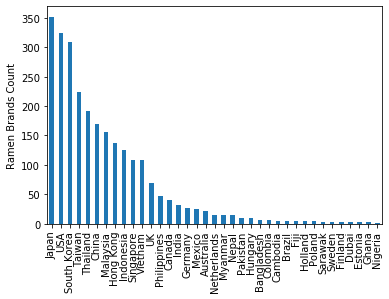

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ramens = pd.read_csv('ramen-ratings.csv')

ramens.info()

# Need to integrate "United States" & "USA"

# 1. find ramen produced in "United States"
# 2. update ramen's country to "USA"
# 3. create new dictionaly??

ramens["Country"].replace("United States", "USA", inplace=True)
        
ramens.Country.value_counts().plot(kind="bar")
plt.ylabel("Ramen Brands Count")

In [46]:
high_rated = ramens["Stars"] >= 4

ramens[high_rated]

Series([], Name: Stars, dtype: bool)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten


There are clear reasons for the top 3 countries. Understandably, Japan makes ramens the most because ramen is originally from Japan. Also, the number of USA ramens is the second biggest since this dataset is made in the USA. Regarding South Korea, they have a similar culture like Japan, and they make many ramens because ramen is also popular in South Korea.

#2 Stars distribution by countries, styles and brands.

In [12]:
#Ramen with star 4-5
#Create a var with the country (how many high rated ramens the country have)
#Style pie chart (which style is popular)

mean

# Should I show in percentage? for example, Japan makes 100 ramens, and 30% of ramen has star 4-5

#3 What are the most popular flavor? (*need to categorize based on the ramen package labels)

In [14]:
# Create category (shoyu, miso, shio, tom yam, kimuchi, etc..)
# Create dictionaly with array({shoyu:[], miso:[], tom_yam:[], kimuchi:[]})
# Iterate through database and see title of the ramen
# If the title contains some of the created category, append the ramen to the appropriate array
# count each category and show in bar chart?



In [16]:
ramens.unique().value_count()

AttributeError: 'DataFrame' object has no attribute 'unique'